In [1]:
! pip install git+https://github.com/cyrilakafia/feu-pipeline.git

  Cloning https://github.com/cyrilakafia/feu-pipeline.git to /tmp/pip-req-build-m7y91ven
  Running command git clone --filter=blob:none --quiet https://github.com/cyrilakafia/feu-pipeline.git /tmp/pip-req-build-m7y91ven
  Resolved https://github.com/cyrilakafia/feu-pipeline.git to commit b7158c87c05d8a8994d63d1fa16a14d916cc9f68
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 23.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 336.3/336.3 kB 11.2 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-

In [ ]:
from feu.inf import run_inference
from feu.prep import prep
import numpy as np
import os
import torch
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [22]:
# Simulated data
data = torch.rand(20, 1000)

In [48]:
# # Preprocess the data
# original_data = 'data.npy'
# preprocessed_data = 'outputs/processed_data.p'

# if not os.path.exists('outputs'):
#     os.makedirs('outputs')

# prep(original_data, preprocessed_data)

Preprocessing done


In [ ]:
# Run the inference process
title = 'demo_run'
device = 'cuda' # 'cuda' or 'cpu'
num_iterations = 10
conc = 1
max_clusters = 20
stimulus_timepoint = 1


best_assigns, best_params, output_prefix = run_inference(
                                        data,
                                        title=title,
                                        device=device,
                                        iterations=num_iterations,
                                        concentration=conc,
                                        max_clusters=max_clusters,
                                        num_trials=1,
                                        t_stimulus=stimulus_timepoint,
                                        seed=None
                                        )

demo_run, Iterations 10, Concentration 1, Max Clusters 20, Number of trials 1, Stimulus Timepoint 1, Seed None
Device cpu
iter: #  0 | time: 13.17 | num clusters: 8 | counts: [1 6 2 1 3 4 1 2] | accept prob: 0.375
             params: [ 0.95  0.6   0.45  1.65 -0.23  1.31  4.49  1.95]
                     [-10.76  -9.71 -17.81 -15.48  -9.06  -4.16 -14.66 -18.03]
iter: #  1 | time: 6.99 | num clusters: 7 | counts: [4 4 1 3 1 6 1] | accept prob: 0.400
             params: [ 0.6   0.38  4.73 -0.23  0.25  2.25  1.82]
                     [ -9.71 -17.68 -13.96  -9.06 -17.41  -8.12 -18.08]
iter: #  2 | time: 8.51 | num clusters: 7 | counts: [4 2 5 1 1 4 3] | accept prob: 0.409
             params: [ 0.6   0.38  0.25  4.77 -0.12  2.99  2.2 ]
                     [ -9.71 -17.68 -15.59 -14.96  -8.14  -9.36  -8.86]
iter: #  3 | time: 10.00 | num clusters: 8 | counts: [2 2 2 5 1 1 4 3] | accept prob: 0.433
             params: [ 0.69  0.6   0.43  0.19  4.77 -0.13  2.99  2.19]
                     

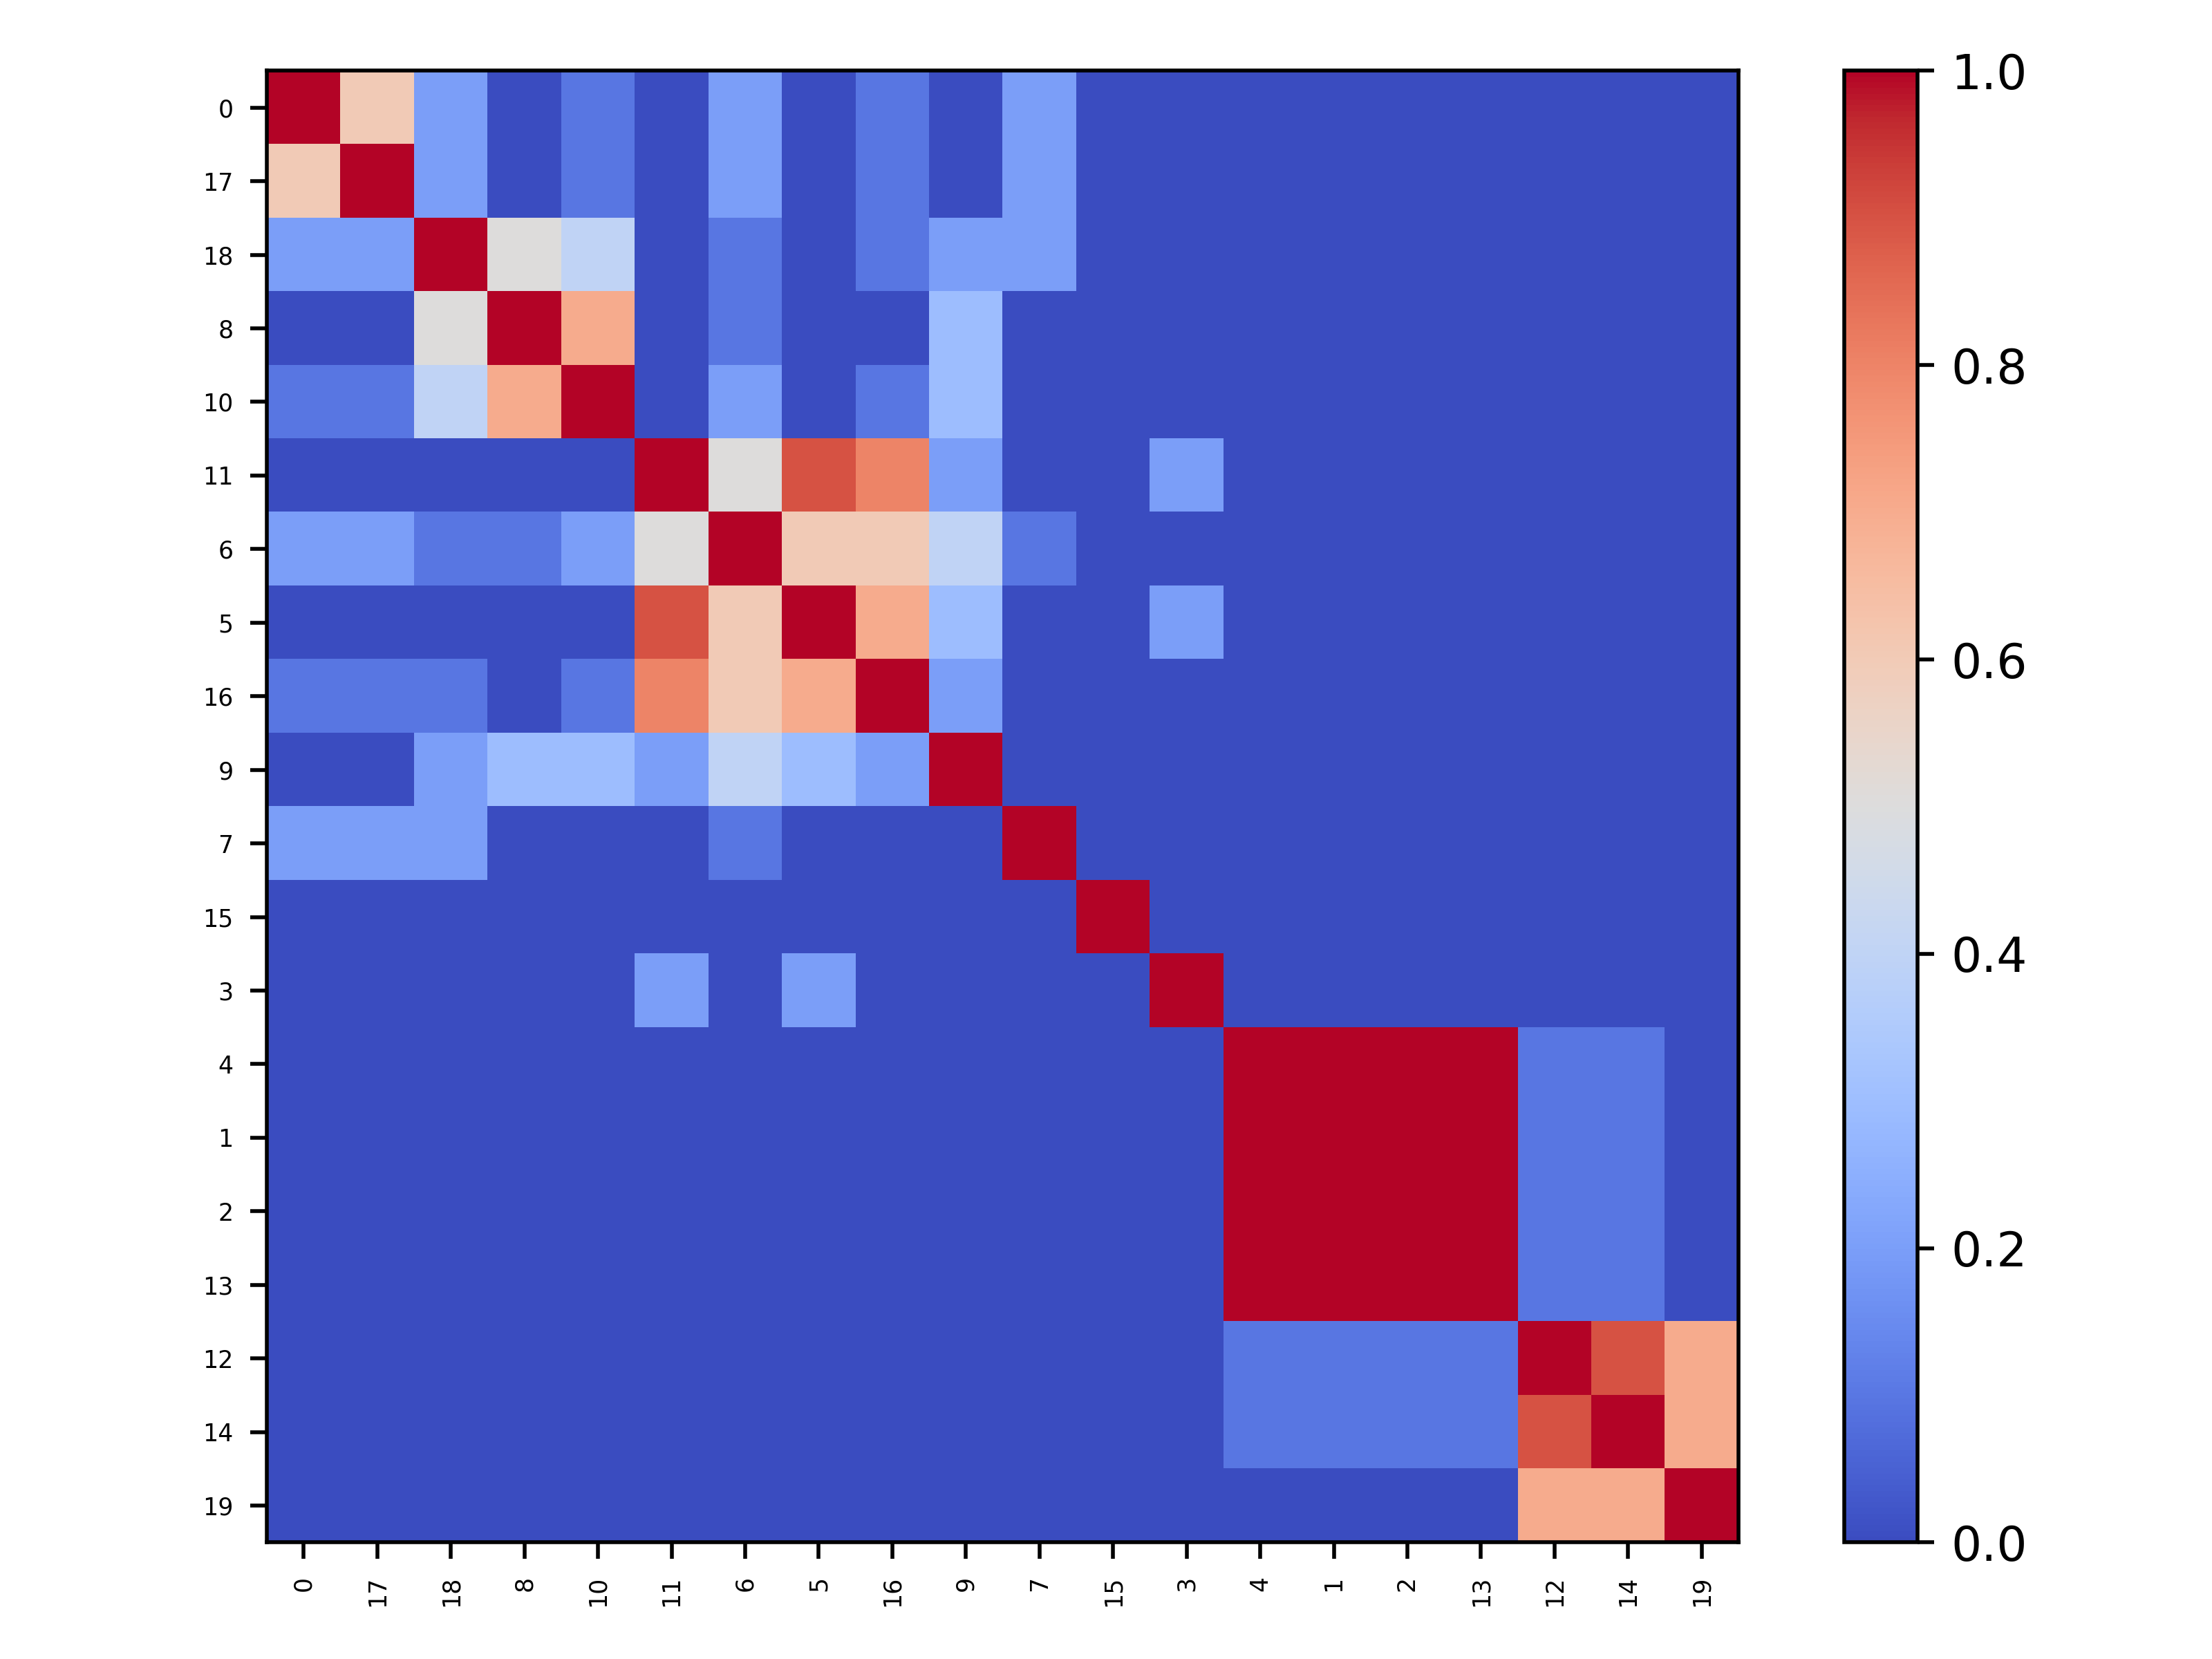

In [ ]:
# view results
from PIL import Image
assigns_image = Image.open(f'{output_prefix}_assigns.png')
params_image = Image.open(f'{output_prefix}_params.png')

display(assigns_image)

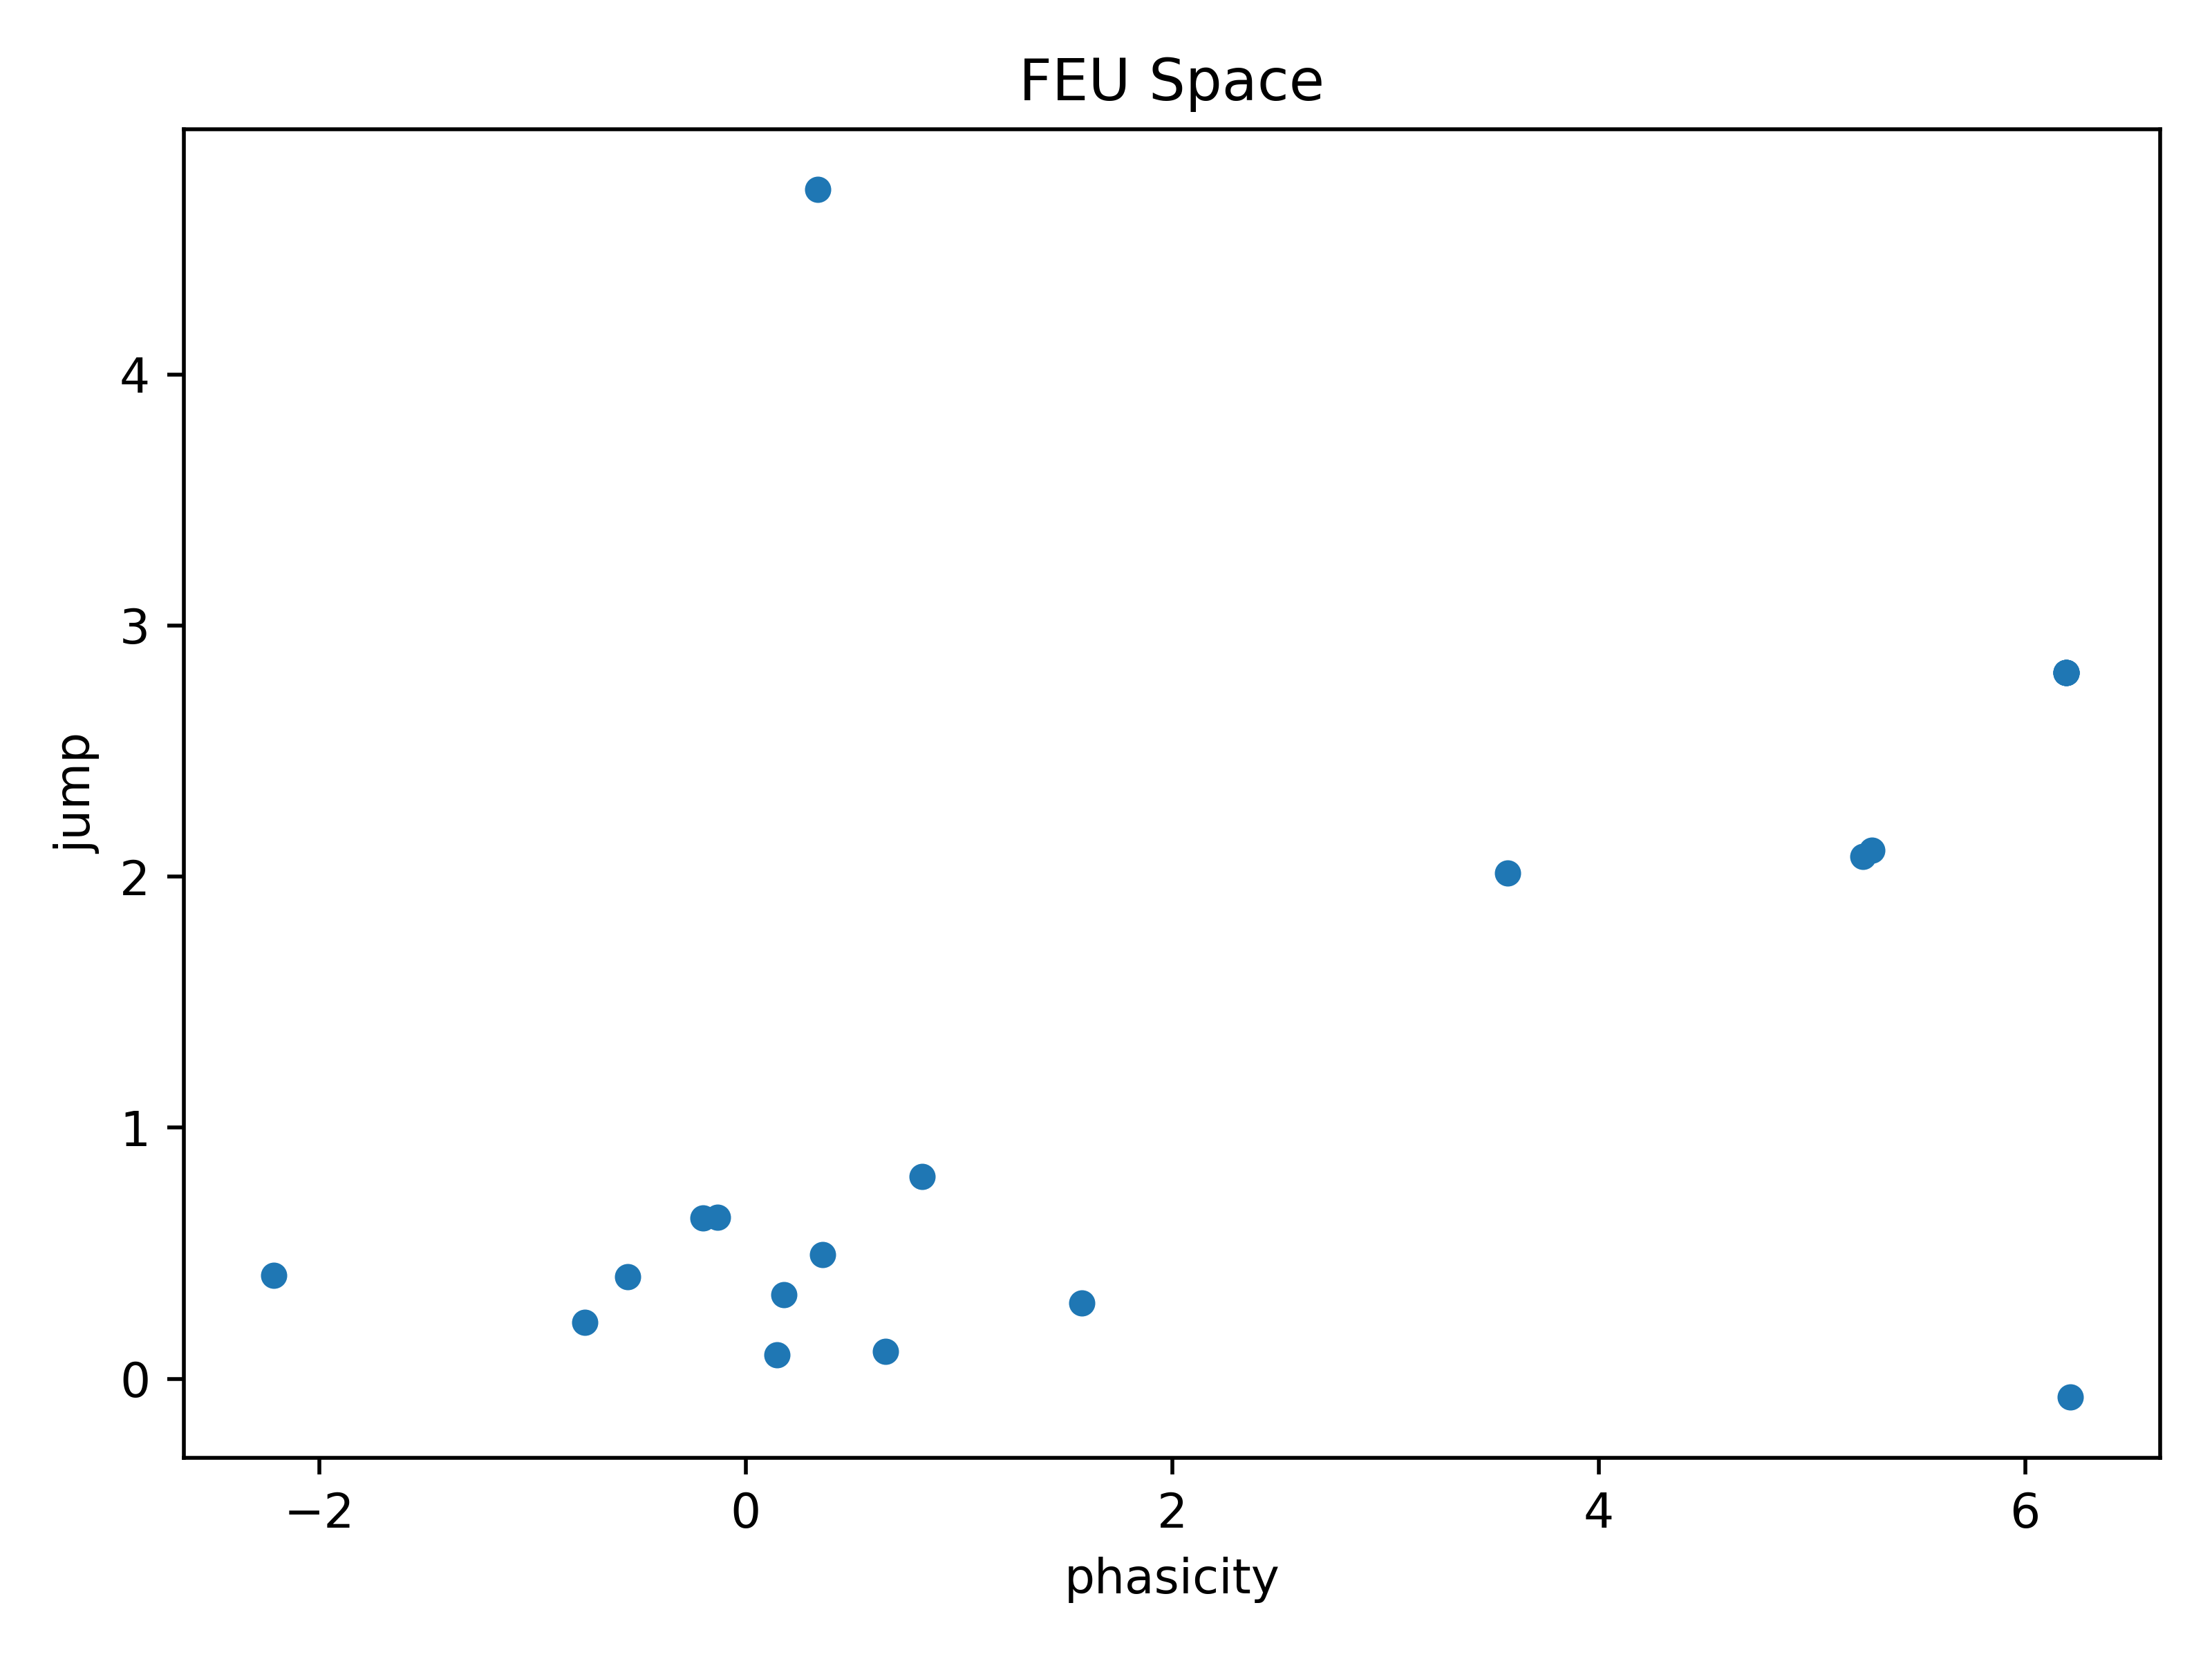

In [28]:
display(params_image)